<a href="https://colab.research.google.com/github/cpchathura/ML-Capstone/blob/main/Telco_CHURN_Prediction_Final_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telco Customer CHURN Prediction

##Capstone Project

Name : Chathura Peiris

Course : Machine Learning Foundations

Date : 21st Nov 2021

eMail : chathura.peiris@dialog.lk

**Note : This notebook contains code for "Hyperparameter Tuning" under Section 5. Hence it may take slitly more time to process (e.g: 5~10mins).**


#1: Import Libraries 

In [1]:
import pandas as pd
import numpy as np

#Data Visualization
from matplotlib import pyplot as plt
from matplotlib import cm

#%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
#from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pickle

In [2]:
!pip install lime

In [3]:
import lime 
from lime import lime_tabular








#2: Data Collection

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/cpchathura/ML-Capstone/main/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

#3: Data Pre-Processing Pipeline

##3.1: Data Analysis

3.1.1: Analysis of data frame for its features (Columns) & data entries (Rows)

In [5]:
data.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

3.1.2: Analysis of data frame composition; shape (i.e. entries, columns), data types & memory usage. ( Alternatively can use data.shape & data.dtypes )


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3.1.3: Statistical analysis of data frame.

In [7]:
data.describe(include='all').transpose()

count unique               top  ...    50%    75%     max
customerID        7043   7043        0129-KPTWJ  ...    NaN    NaN     NaN
gender            7043      2              Male  ...    NaN    NaN     NaN
SeniorCitizen     7043    NaN               NaN  ...      0      0       1
Partner           7043      2                No  ...    NaN    NaN     NaN
Dependents        7043      2                No  ...    NaN    NaN     NaN
tenure            7043    NaN               NaN  ...     29     55      72
PhoneService      7043      2               Yes  ...    NaN    NaN     NaN
MultipleLines     7043      3                No  ...    NaN    NaN     NaN
InternetService   7043      3       Fiber optic  ...    NaN    NaN     NaN
OnlineSecurity    7043      3                No  ...    NaN    NaN     NaN
OnlineBackup      7043      3                No  ...    NaN    NaN     NaN
DeviceProtection  7043      3                No  ...    NaN    NaN     NaN
TechSupport       7043      3                No  ...    NaN    NaN     NaN
StreamingTV       7043      3                No  ...    NaN    NaN     NaN
StreamingMovies   7043      3                No  ...    NaN    NaN     NaN
Contract          7043      3    Month-to-month  ...    NaN    NaN     NaN
PaperlessBilling  7043      2               Yes  ...    NaN    NaN     NaN
PaymentMethod     7043      4  Electronic check  ...    NaN    NaN     NaN
MonthlyCharges    7043    NaN               NaN  ...  70.35  89.85  118.75
TotalCharges      7043   6531                    ...    NaN    NaN     NaN
Churn             7043      2                No  ...    NaN    NaN     NaN

[21 rows x 11 columns]

3.1.4: Analysis of unique values for each feature

In [8]:
def unique_values(df):
  for column in df:
   print(f'{column} : {df[column].unique()} Count : {df[column].nunique()}\n')

In [9]:
unique_values(data)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] Count : 7043

gender : ['Female' 'Male'] Count : 2

SeniorCitizen : [0 1] Count : 2

Partner : ['Yes' 'No'] Count : 2

Dependents : ['No' 'Yes'] Count : 2

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] Count : 73

PhoneService : ['No' 'Yes'] Count : 2

MultipleLines : ['No phone service' 'No' 'Yes'] Count : 3

InternetService : ['DSL' 'Fiber optic' 'No'] Count : 3

OnlineSecurity : ['No' 'Yes' 'No internet service'] Count : 3

OnlineBackup : ['Yes' 'No' 'No internet service'] Count : 3

DeviceProtection : ['No' 'Yes' 'No internet service'] Count : 3

TechSupport : ['No' 'Yes' 'No internet service'] Count : 3

StreamingTV : ['No' 'Yes' 'No internet service'] Count : 3

StreamingMovies : ['No' 'Yes' 'No inte

##3.2: Data Preprocessing for EDA

3.2.1: Change the data type of 'TotalCharges' from 'Object' to 'float'.

In [10]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

3.2.2: Analyse missing values for each feature

In [11]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3.2.3: Data Clensing & Transformation

In [12]:
# Drop rows with missing values.
data = data.dropna()

In [13]:
data['TotalCharges'].isna().sum()

0

In [14]:
#Drop non value addting features 
data.drop('customerID', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
#Add new features : Add 'TotVAS' by summing up all add-on services subscribed. 
data['TotVAS'] = (data[['InternetService', 'OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotVAS'],
      dtype='object')

##3.3: Exploratory Data Analysis (EDA) 

3.3.1: Analyse Churn distribution

In [18]:
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [19]:
5163/(5163+1869)

0.7342150170648464

In [20]:
1869/(5163+1869)

0.26578498293515357

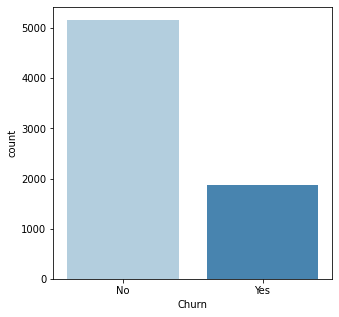

In [21]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=data['Churn'], palette="Blues", linewidth=1)
plt.show()

Figure shows imbalance of Churn vs Non-Churn customers. 

3.3.2: Analyse Box Plot to check Median & out-liers 

In [22]:
#data['tenure'].plot(kind='box')
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])

    plt.figure(figsize=(15,5))

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

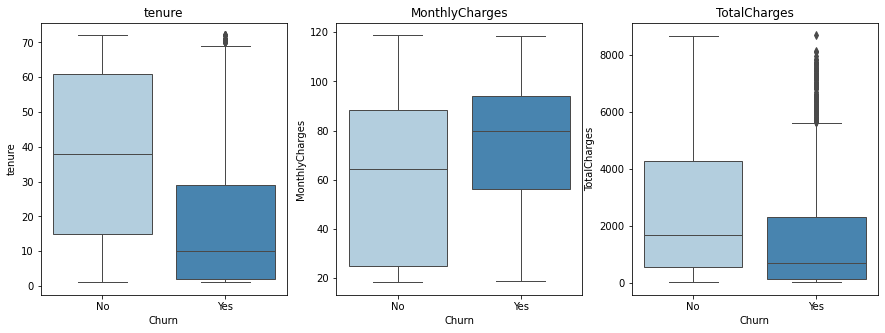

In [23]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharges.
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], data)

Plot insights:
* Customers who churned had much lower tenure with a median of 10 months & much lower inter quartile range (IQR) as compared to non-churners. (median of 38 months)
* Customers who churned had higher monthly charges with a median of 80 USD and much lower IQR compared to that of non-churners (median of 65 USD).
* TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

3.3.3: Analyse Count Plots 

In [24]:
# Create a function to generate countplots:
def countplot(x, y, df1):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    #plt.figure(figsize=(7*columns, 7*rows))
    plt.figure(figsize=(20, 10))

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df1, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

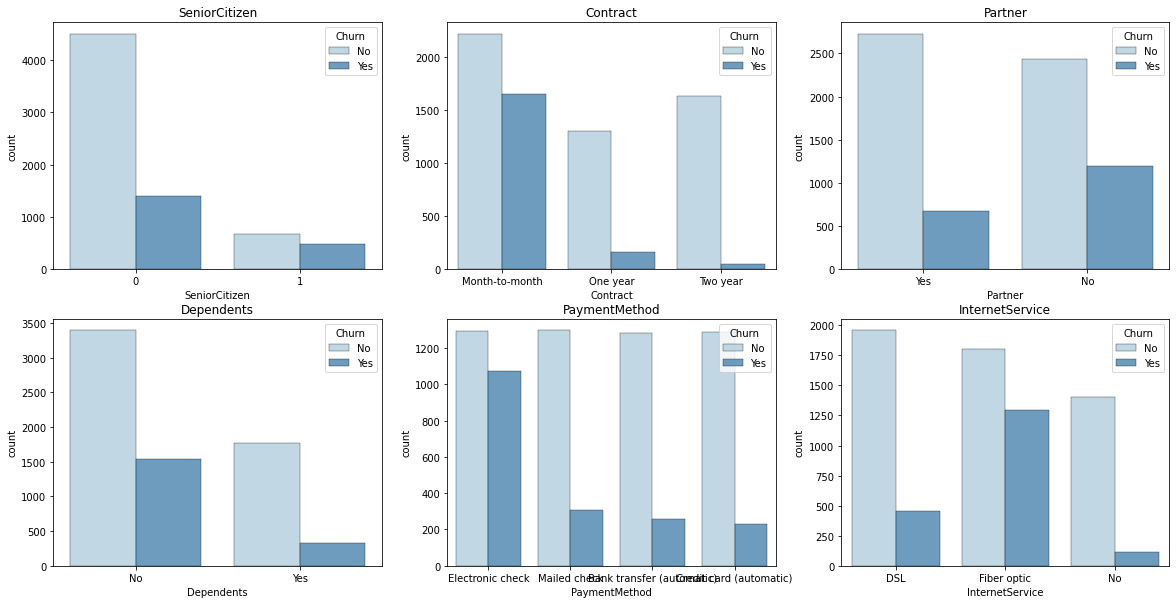

In [25]:
# Generate countplots for various features.

countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], data)

Plot insights:

* Senior citizens churn rate is much higher than non-senior churn rate.
* Churn rate for month-to-month contracts much higher that for other contract durations.
* Moderately higher churn rate for customers without partners.
* Much higher churn rate for customers without children.
* Payment method electronic check shows much higher churn rate than other payment methods.
* Customers with InternetService fiber optic as part of their contract have much higher churn rate.

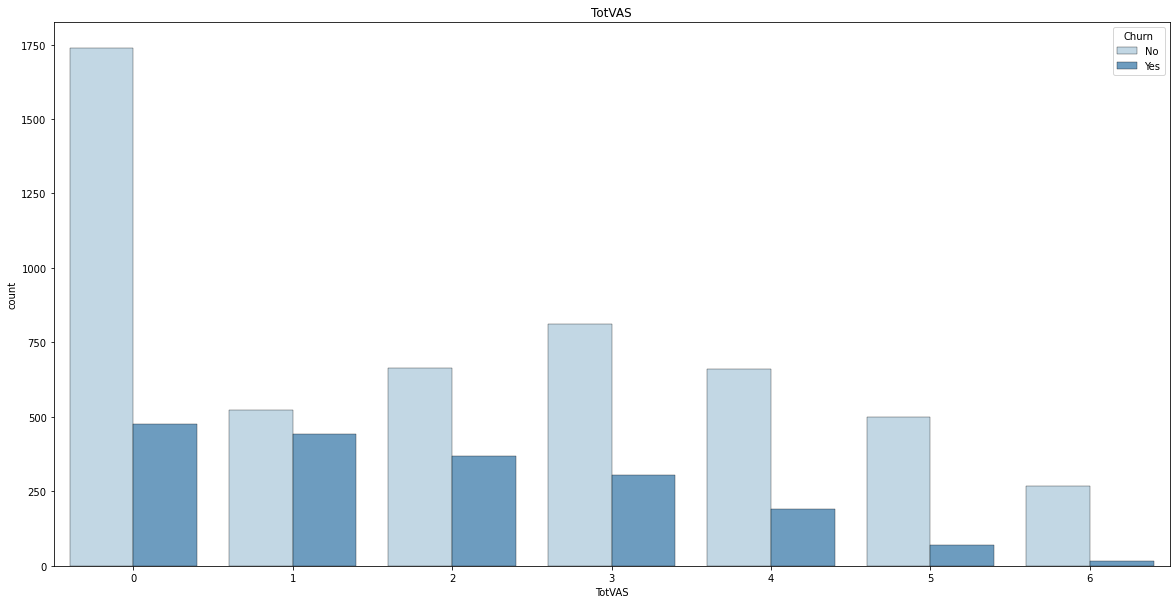

In [26]:
# Generate countplot for the new feature.
countplot('Churn', ['TotVAS'], data)

Plot insights:

* Customers with a very high number of additional value added services(VAS) do have a low churn rate.

3.3.4: Feature Engineering for EDA

3.3.4.1: Normalize Unique Values

In [27]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [28]:
unique_values(data)

gender : ['Female' 'Male'] Count : 2

SeniorCitizen : [0 1] Count : 2

Partner : ['Yes' 'No'] Count : 2

Dependents : ['No' 'Yes'] Count : 2

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] Count : 72

PhoneService : ['No' 'Yes'] Count : 2

MultipleLines : ['No' 'Yes'] Count : 2

InternetService : ['DSL' 'Fiber optic' 'No'] Count : 3

OnlineSecurity : ['No' 'Yes'] Count : 2

OnlineBackup : ['Yes' 'No'] Count : 2

DeviceProtection : ['No' 'Yes'] Count : 2

TechSupport : ['No' 'Yes'] Count : 2

StreamingTV : ['No' 'Yes'] Count : 2

StreamingMovies : ['No' 'Yes'] Count : 2

Contract : ['Month-to-month' 'One year' 'Two year'] Count : 3

PaperlessBilling : ['Yes' 'No'] Count : 2

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] Count : 4

MonthlyCharges : 

3.3.4.2: Label Encording ( Apply for features with 2 unique values)

In [29]:
# Label encoding for identified columns. (Instead of map can also use replace )

def label_encoding(features, df):
    for col in features:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    return       

label_encoding(['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'], data)

data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})

3.3.4.3: One Hot Encording ( Apply for features with more than 2 unique values )

In [30]:
data = pd.get_dummies(data, columns=['InternetService','Contract','PaymentMethod'])
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TotVAS',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
data.shape

(7032, 28)

3.3.4.4: Feature Rescalling: Min-Max Scaling

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [33]:
#Reconfirm Unique values
unique_values(data)

gender : [1 0] Count : 2

SeniorCitizen : [0 1] Count : 2

Partner : [1 0] Count : 2

Dependents : [0 1] Count : 2

tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127] Count : 72

PhoneService : [0 1] Count : 2

MultipleLines : [0 1] Count 

3.3.5: Correlation Analysis

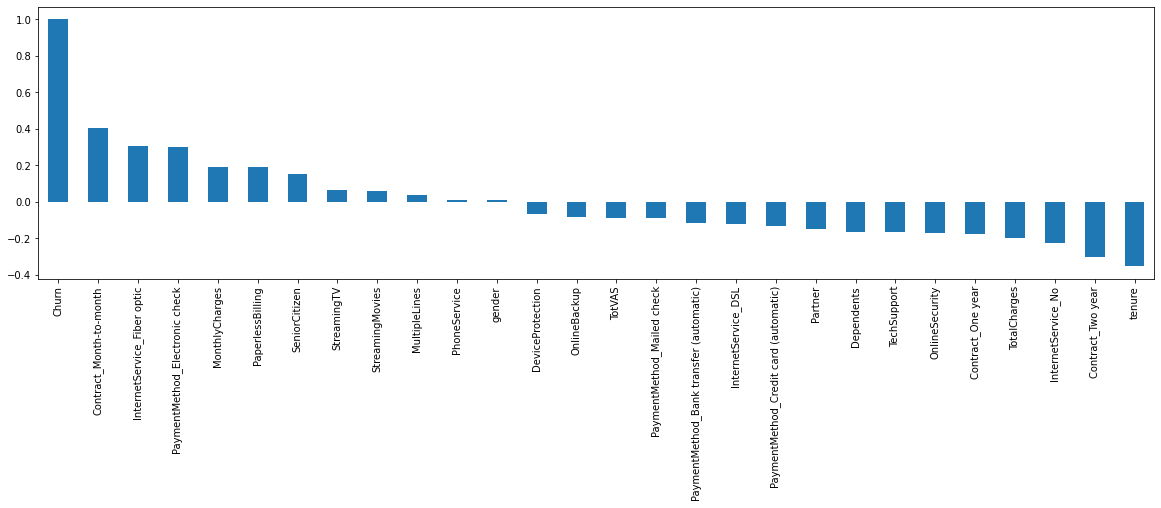

In [34]:
# Show correlation plot for correlation of Churn with each of the remaining features.
plt.figure(figsize=(16,10))
data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

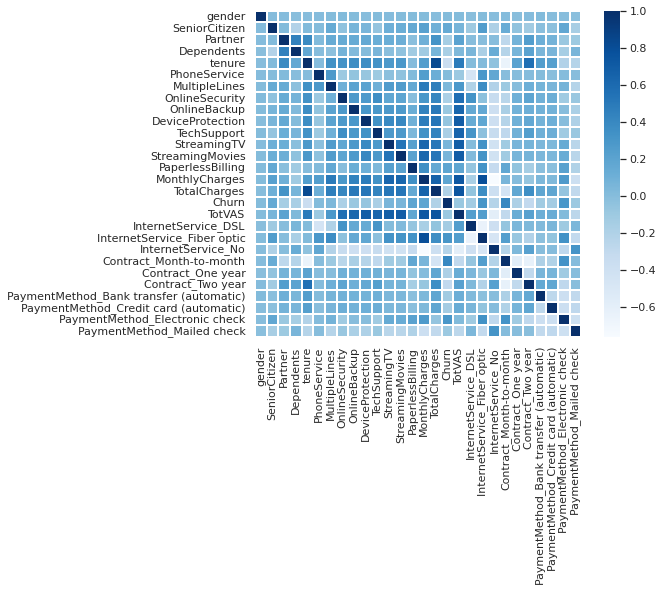

In [35]:
# Correlation Matrix
sns.set(font_scale=0.6)
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data.corr(), cmap='Blues', linewidth=1, square = True)


#4: Model Building & Scoring Pipeline

##4.1: Train Test Split

4.1.1 Define X & y variables

In [36]:
# 'TotalCharges' not considered as its highly correlated with MonthlyCharges & Tenure  

X = data.drop(['Churn', 'TotalCharges', 'TotVAS'], axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##4.2: Model Evaluation Metrics Definition

4.2.1: Function to plot feature weights for a classifier.

In [37]:
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

4.2.2: Function to plot confusion matrix for a classifier and train and test accuracy

In [38]:
#List creation for final model performance bar plot under section 6
model_list = []
acc_list = []
pre_list = []
rec_list = []
f1_list = []

In [39]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
        
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(classification_report(y_test, y_pred))

    #Data collection for final model performance bar plot
    model_acc = accuracy_score(y_test, y_pred)
    model_pre = precision_score(y_test, y_pred)
    model_rec = recall_score(y_test, y_pred)
    model_f1 = f1_score(y_test, y_pred)
    
    model_list.append(classifier_name)
    acc_list.append(model_acc)
    pre_list.append(model_pre)
    rec_list.append(model_rec)
    f1_list.append(model_f1)
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

4.2.3: Function to plot ROC curve and AUC score

In [40]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

    return print('')


4.2.4: Function to plot precision-recall-curve (PRC) and the F1 score and AUC score

In [41]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

##4.3: Model Selection, Traning, Prediction & Scoring

##4.3.1: Logistic Regression (LR)

4.3.1.1: Model Import - LR

In [42]:
mlr = LogisticRegression(max_iter=1000)

4.3.1.2: Model Fit - LR

In [43]:
mlr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

4.3.1.3: Model Predict - LR

In [44]:
y_pred_mlr = mlr.predict(X_test)
y_pred_prob_mlr = mlr.predict_proba(X_test)

y_pred_mlr

array([0, 0, 1, ..., 0, 0, 0])

4.3.1.4: Model Scoring - LR

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


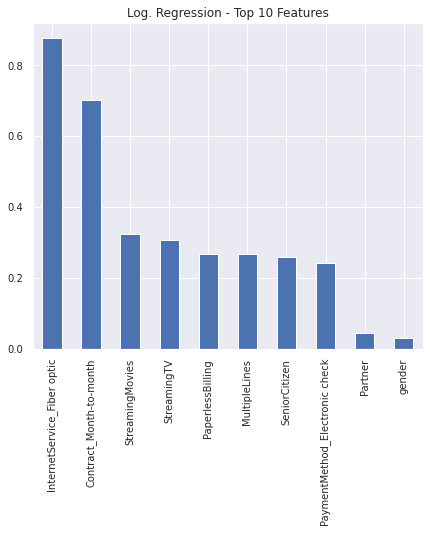

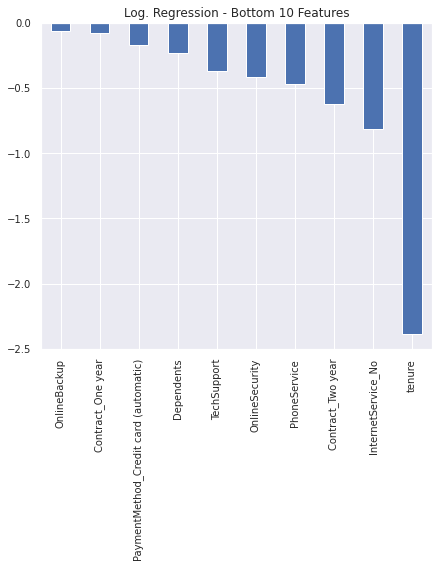

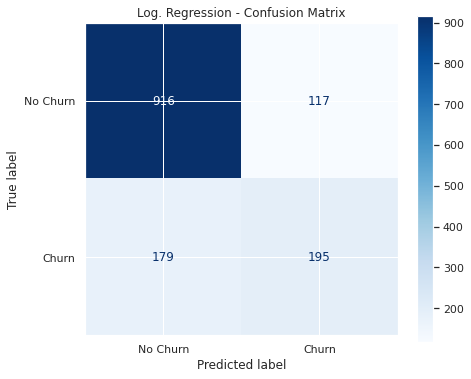

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


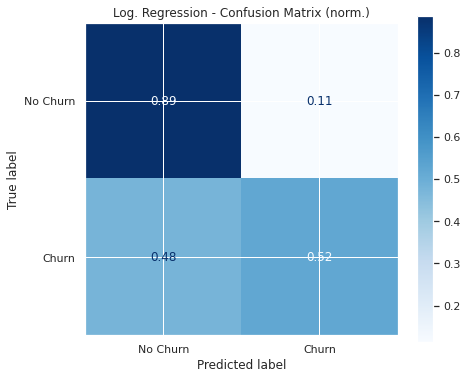

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy Score Test: 0.7896233120113717
Accuracy Score Train: 0.8053333333333333 (as comparison)



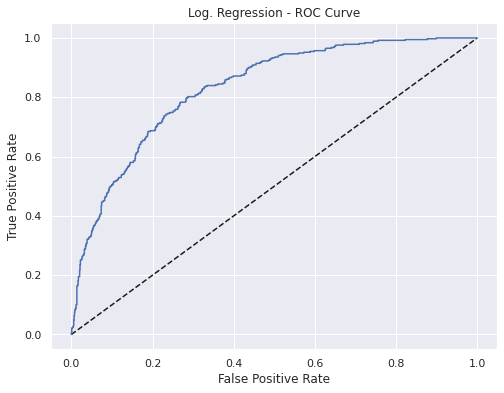

AUC Score (ROC): 0.8304753301479




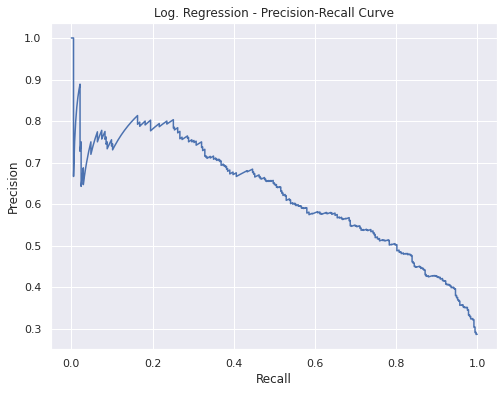

F1 Score: 0.5685131195335277 
AUC Score (PR): 0.6235282116602682



In [45]:
feature_weights(X, mlr, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, mlr, y_pred_mlr, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_prob_mlr, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_mlr, y_pred_prob_mlr, 'Log. Regression')

4.3.1.5: Model Interpretation - LR

In [46]:
mlr.classes_

array([0, 1])

In [47]:
test_sample_features_mlr = X_test.sample()
test_sample_features_mlr

gender  ...  PaymentMethod_Mailed check
4958       1  ...                           0

[1 rows x 25 columns]

In [48]:
test_sample_outcome_mlr = y_test.iloc[2]
test_sample_outcome_mlr

1

In [49]:
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_sample_features_mlr.values[0],
    predict_fn=mlr.predict_proba)
lime_exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


##4.3.2: Random Forest (RF)

4.3.2.1: Model Import - RF

In [50]:
mrf = RandomForestClassifier()

4.3.2.2: Model Fit - RF

In [51]:
mrf.fit(X_train, y_train)

RandomForestClassifier()

4.3.2.3: Model Predict - RF

In [52]:
y_pred_mrf = mrf.predict(X_test)
y_pred_prob_mrf = mrf.predict_proba(X_test)

4.3.2.4: Model Scoring - RF

In [53]:
mrf.feature_importances_

array([0.03334286, 0.02343372, 0.02619046, 0.02271997, 0.22524448,
       0.00748971, 0.02265921, 0.02553278, 0.0248526 , 0.02255249,
       0.02285618, 0.02078537, 0.02118445, 0.02839378, 0.22599484,
       0.01042534, 0.04112352, 0.01598073, 0.07711136, 0.01142869,
       0.02201148, 0.01240583, 0.0134789 , 0.03108029, 0.01172097])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


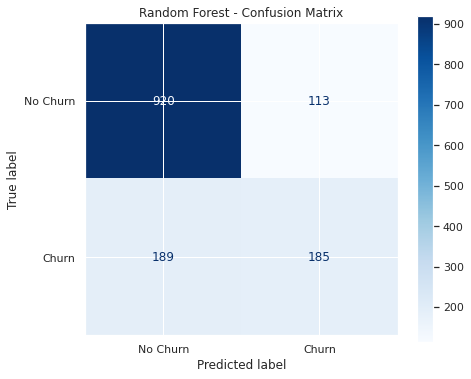

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


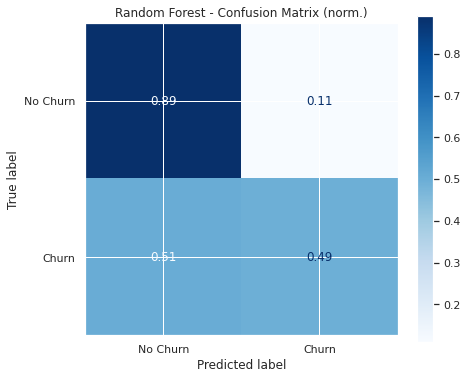

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Accuracy Score Test: 0.7853589196872779
Accuracy Score Train: 0.9973333333333333 (as comparison)



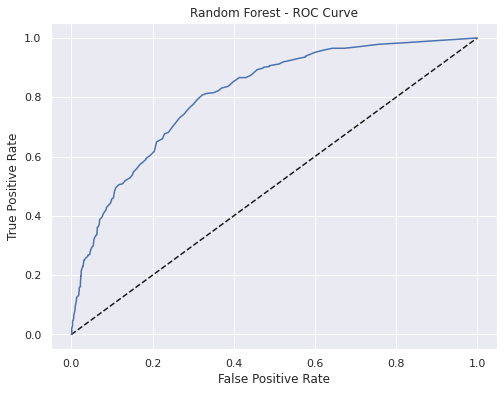

AUC Score (ROC): 0.8080819584720274




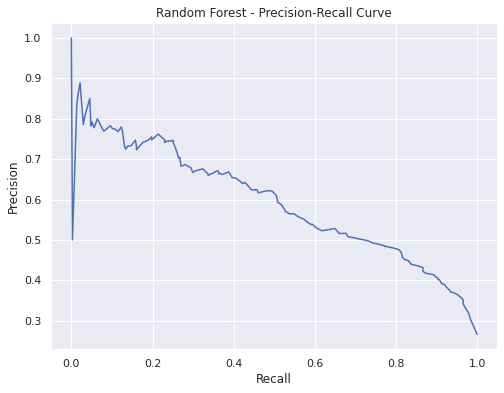

F1 Score: 0.550595238095238 
AUC Score (PR): 0.5920900209183163



In [54]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, mrf, y_pred_mrf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_prob_mrf, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_mrf, y_pred_prob_mrf, 'Random Forest')

4.3.2.5: Model Interpretation - RF

In [55]:
mrf.classes_

array([0, 1])

In [56]:
test_sample_features_mrf = X_test.sample()
test_sample_features_mrf

gender  ...  PaymentMethod_Mailed check
6656       0  ...                           1

[1 rows x 25 columns]

In [57]:
test_sample_outcome_mrf = y_test.iloc[2]
test_sample_outcome_mrf

1

In [58]:
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_sample_features_mrf.values[0],
    predict_fn=mrf.predict_proba)
lime_exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


##4.3.3: Support Vector Machine (SVM)

4.3.3.1: Model Import - SVM

In [59]:
mSVM = SVC(kernel='linear', probability=True)

4.3.3.2: Model Fit - SVM

In [60]:
mSVM.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

4.3.3.3: Model Predict - SVM

In [61]:
y_pred_mSVM = mSVM.predict(X_test)
y_pred_prob_mSVM = mSVM.predict_proba(X_test)

4.3.3.4: Model Scoring - SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


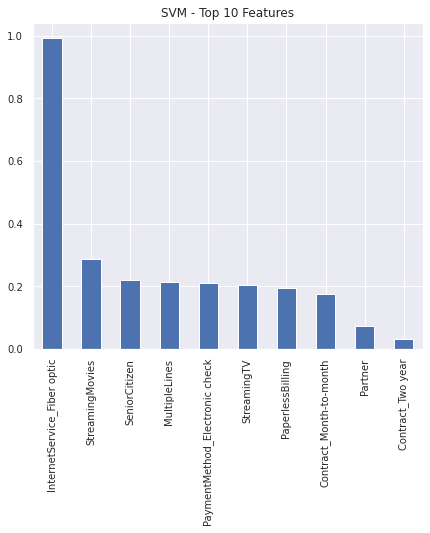

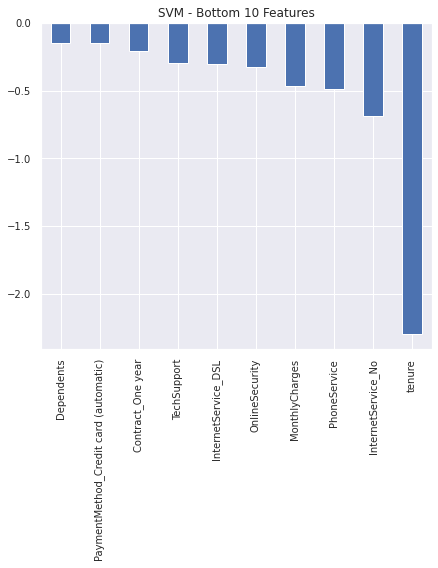

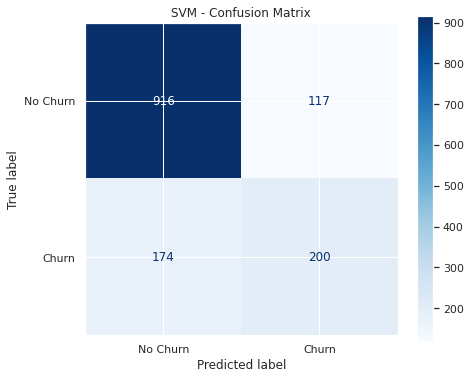

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


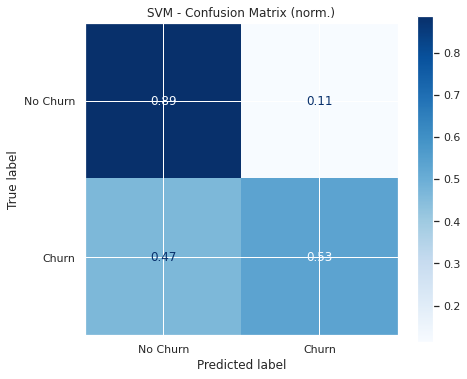

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Accuracy Score Test: 0.7931769722814499
Accuracy Score Train: 0.8046222222222222 (as comparison)



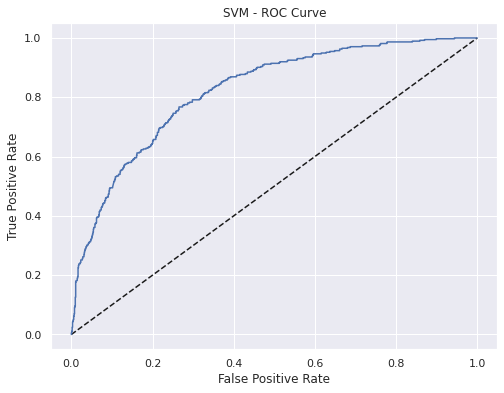

AUC Score (ROC): 0.8213719968318225




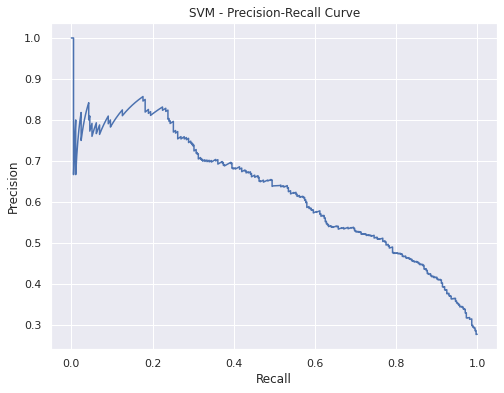

F1 Score: 0.5788712011577424 
AUC Score (PR): 0.6248450878636971



In [62]:
feature_weights(X, mSVM, 'SVM')
confusion_matrix_plot(X_train, y_train, X_test, y_test, mSVM, y_pred_mSVM, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_prob_mSVM, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_mSVM, y_pred_prob_mSVM, 'SVM')

4.3.3.5: Model Interpritation - SVM

In [63]:
mrf.classes_

array([0, 1])

In [64]:
test_sample_features_mSVM = X_test.sample()
test_sample_features_mSVM

gender  ...  PaymentMethod_Mailed check
3383       0  ...                           0

[1 rows x 25 columns]

In [65]:
test_sample_outcome_mSVM = y_test.iloc[2]
test_sample_outcome_mSVM

1

In [66]:
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_sample_features_mSVM.values[0],
    predict_fn=mSVM.predict_proba)
lime_exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


##4.3.4: Deep Learning - Artificial Neural Network (ANN)

4.3.4.1: Model Import - ANN

In [67]:
X_train.shape

(5625, 25)

In [68]:
X_test.shape

(1407, 25)

In [69]:
mANN = keras.Sequential([
    keras.layers.Dense(256, input_shape=(25,), activation='relu'),
    keras.layers.Dense(128, input_shape=(25,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),

])

In [70]:
print(mANN.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6656      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 39,681
Trainable params: 39,681
Non-trainable params: 0
_________________________________________________________________
None


4.3.4.2: Model Compile - ANN

In [71]:
mANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

4.3.3.3: Model Fit - ANN

In [72]:
mANN.fit(X_train, y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.4458 - accuracy: 0.7854
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8004
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8034
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8082
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8064
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8156
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8178
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8153
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8164
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8192

4.3.4.4: Model Predict - ANN

In [73]:
y_pred_prob_mANN = mANN.predict(X_test)[:, 0]
y_pred_prob_mANN

array([0.01790372, 0.15542674, 0.74630976, ..., 0.04794624, 0.33492267,
       0.00480032], dtype=float32)

In [74]:
#Data Post Processing 
#Another Option : y_pred_mANN = np.argmax(y_pred_prob_mANN, axis=1)

y_pred_mANN = []
for element in y_pred_prob_mANN:
  if element > 0.5:
    y_pred_mANN.append(1)
  else:
    y_pred_mANN.append(0)


In [75]:
y_pred_mANN[:5]

[0, 0, 1, 0, 0]

In [76]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred_mANN, 'y_pred_prob':y_pred_prob_mANN})
test_result.head()

y_act  y_pred  y_pred_prob
2481      0       0     0.017904
6784      0       0     0.155427
6125      1       1     0.746310
3052      0       0     0.058726
4099      0       0     0.463726

4.3.4.5: Model Evaluation - ANN

Text(21.5, 0.5, 'Truth')

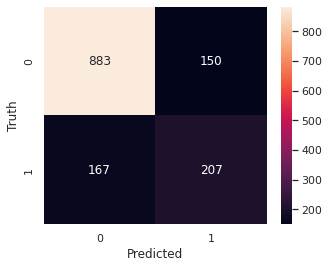

In [77]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_mANN)

plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
print(classification_report(y_test, y_pred_mANN))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.58      0.55      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [79]:
#Data collection for final model performance bar plot
model_acc = accuracy_score(y_test, y_pred_mANN)
model_pre = precision_score(y_test, y_pred_mANN)
model_rec = recall_score(y_test, y_pred_mANN)
model_f1 = f1_score(y_test, y_pred_mANN)

model_list.append('ANN')
acc_list.append(model_acc)
pre_list.append(model_pre)
rec_list.append(model_rec)
f1_list.append(model_f1)

ROC AUC Score = 0.8135757955386678


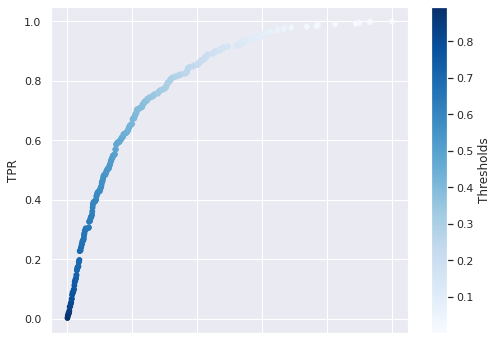

In [80]:
from matplotlib import cm
cmap = cm.get_cmap('Blues') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

print(F"ROC AUC Score = {roc_auc}")

PRC AUC Score = 0.5798319327731093


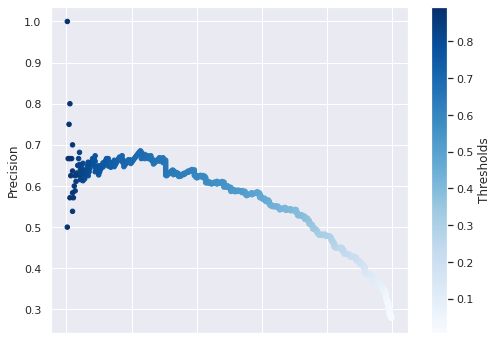

In [81]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)

prc_auc = metrics.precision_score(test_result['y_act'], test_result['y_pred'])

print(F"PRC AUC Score = {prc_auc}")

#5 : Model Improvement Pipeline - Hyperparameter Tuning (HPT)

##5.1: Logistic Regression - HPT

5.1.1: HPT LR - Model Import

In [82]:
mlr_tuned = LogisticRegression(solver='saga', max_iter=1000) 

5.1.2: HPT LR - Grid Search CV : Define Parameter Grid 

In [83]:
param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
mlr_tuned_gs = GridSearchCV(mlr_tuned, param_grid_L1, cv=5)


5.1.3: HPT LR - Model Fit 

In [84]:
mlr_tuned_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'penalty': ['l1', 'l2']})

5.1.4: HPT LR - Select Best Model Parameters & Predict

In [85]:
y_pred_mlr_tuned = mlr_tuned_gs.predict(X_test)
y_pred_prob_mlr_tuned = mlr_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', mlr_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 0.30000000000000004, 'penalty': 'l2'}


5.1.5: HPT LR - Model Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


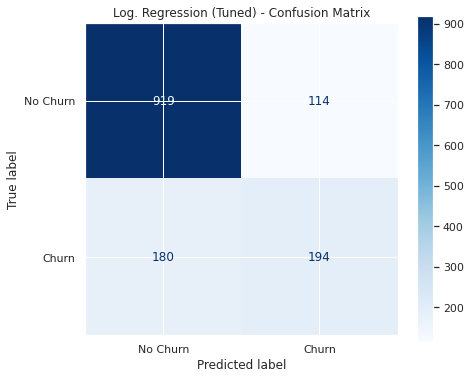

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


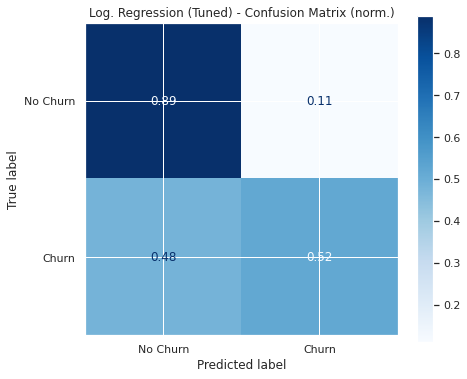

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy Score Test: 0.7910447761194029
Accuracy Score Train: 0.8056888888888889 (as comparison)



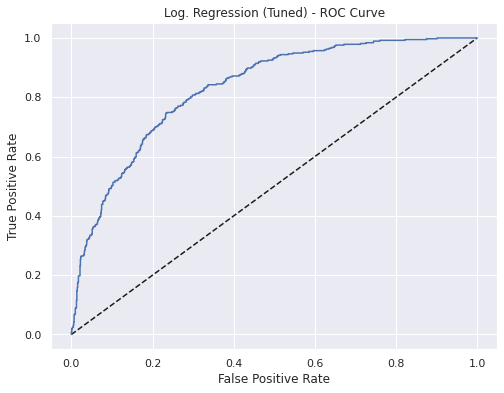

AUC Score (ROC): 0.830123310434796




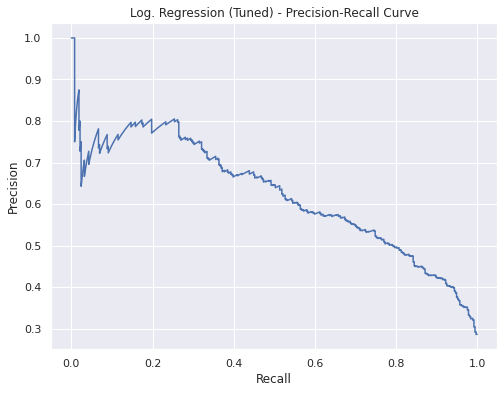

F1 Score: 0.5689149560117301 
AUC Score (PR): 0.6228089917478592



In [86]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, mlr_tuned_gs, y_pred_mlr_tuned, 'Log. Regression (Tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_prob_mlr_tuned, 'Log. Regression (Tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_mlr_tuned, y_pred_prob_mlr_tuned, 'Log. Regression (Tuned)')

##5.2 : Random Forest - HPT

5.2.1: HPT RF - Model Import

In [87]:
mrf_tuned = RandomForestClassifier()

5.2.2: HPT RF - Randomized Search CV : Define Parameter Grid

In [88]:
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}
mrf_tuned_random = RandomizedSearchCV(estimator=mrf_tuned, param_distributions=param_grid_rf, cv=5, verbose=0)

5.2.3: HPT RF - Model Fit

In [89]:
mrf_tuned_random.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  21...
       1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320,
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650,
       1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 176

5.2.4: HPT RF - Select Best Model Parameters & Predict

In [90]:
y_pred_mrf_tuned = mrf_tuned_random.predict(X_test)
y_pred_prob_mrf_tuned = mrf_tuned_random.predict_proba(X_test)

print('Random Forest - Best Parameters: ', mrf_tuned_random.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 1900, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}


5.2.5: HPT RF - Model Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


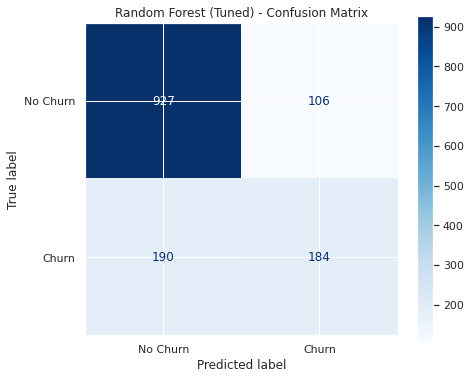

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


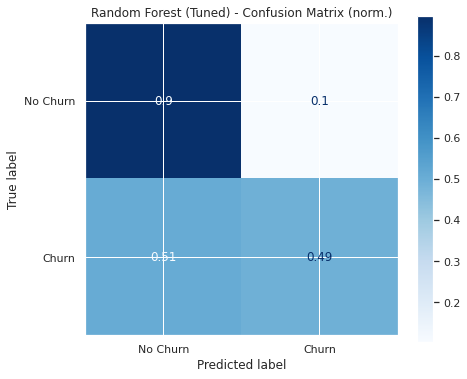

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy Score Test: 0.7896233120113717
Accuracy Score Train: 0.8794666666666666 (as comparison)



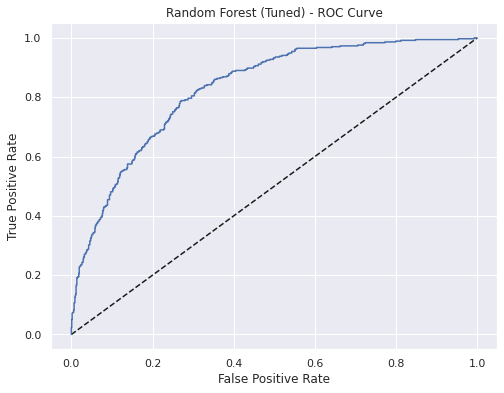

AUC Score (ROC): 0.8289028891500276




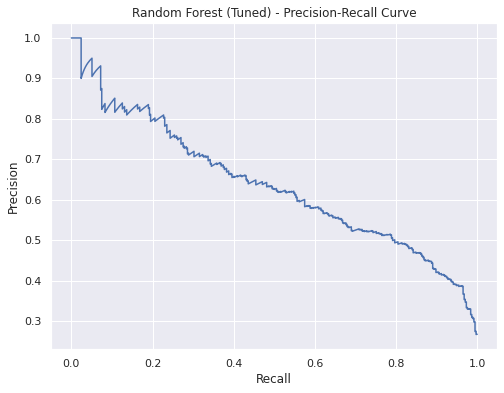

F1 Score: 0.5542168674698795 
AUC Score (PR): 0.6361023043168073



In [91]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, mrf_tuned_random, y_pred_mrf_tuned, 'Random Forest (Tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_prob_mrf_tuned, 'Random Forest (Tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_mrf_tuned, y_pred_prob_mrf_tuned, 'Random Forest (Tuned)')

##5.3: Support Vector Machine (SVM)- HPT

5.3.1: HPT SVM - Model Import

In [92]:
mSVM_tuned = SVC(kernel='linear', probability=True)

5.3.2: HPT SVM - Grid Search CV : Define Parameter Grid

In [93]:
param_grid_svm = {'C': np.arange(.1, 3, .1)}

mSVM_tuned_gs = GridSearchCV(mSVM_tuned, param_grid_svm, cv=5)


5.3.3: HPT SVM - Model Fit

In [94]:
mSVM_tuned_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])})

5.3.4: HPT SVM - Select Best Model Parameters & Predict

In [95]:
y_pred_mSVM_tuned = mSVM_tuned_gs.predict(X_test)
y_pred_prob_mSVM_tuned = mSVM_tuned_gs.predict_proba(X_test)

print('SVM best Parameters', mSVM_tuned_gs.best_params_, '\n')

SVM best Parameters {'C': 0.2} 



5.3.5: HPT SVM - Model Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


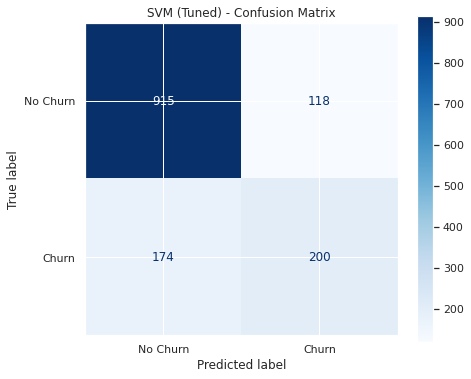

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


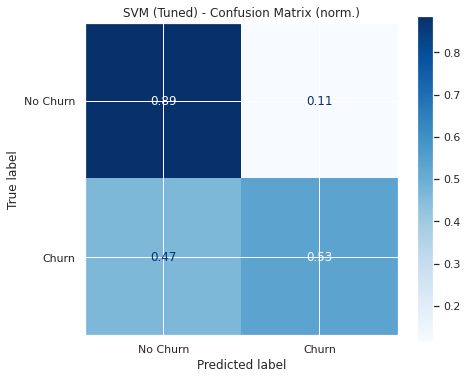

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Accuracy Score Test: 0.7924662402274343
Accuracy Score Train: 0.8051555555555555 (as comparison)



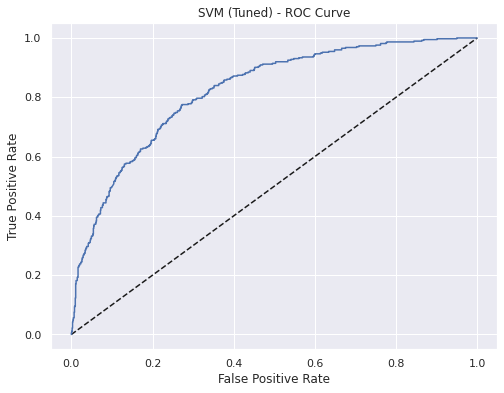

AUC Score (ROC): 0.8217058978832226




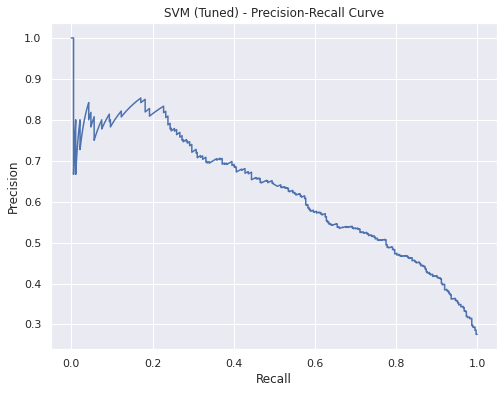

F1 Score: 0.5780346820809249 
AUC Score (PR): 0.6247237791053385



In [96]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, mSVM_tuned_gs, y_pred_mSVM_tuned, 'SVM (Tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_prob_mSVM_tuned, 'SVM (Tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_mSVM_tuned, y_pred_prob_mSVM_tuned, 'SVM (Tuned)')

#6: Optimal Model Selection & Saving

Text(0.5, 1.0, 'F1 Score')

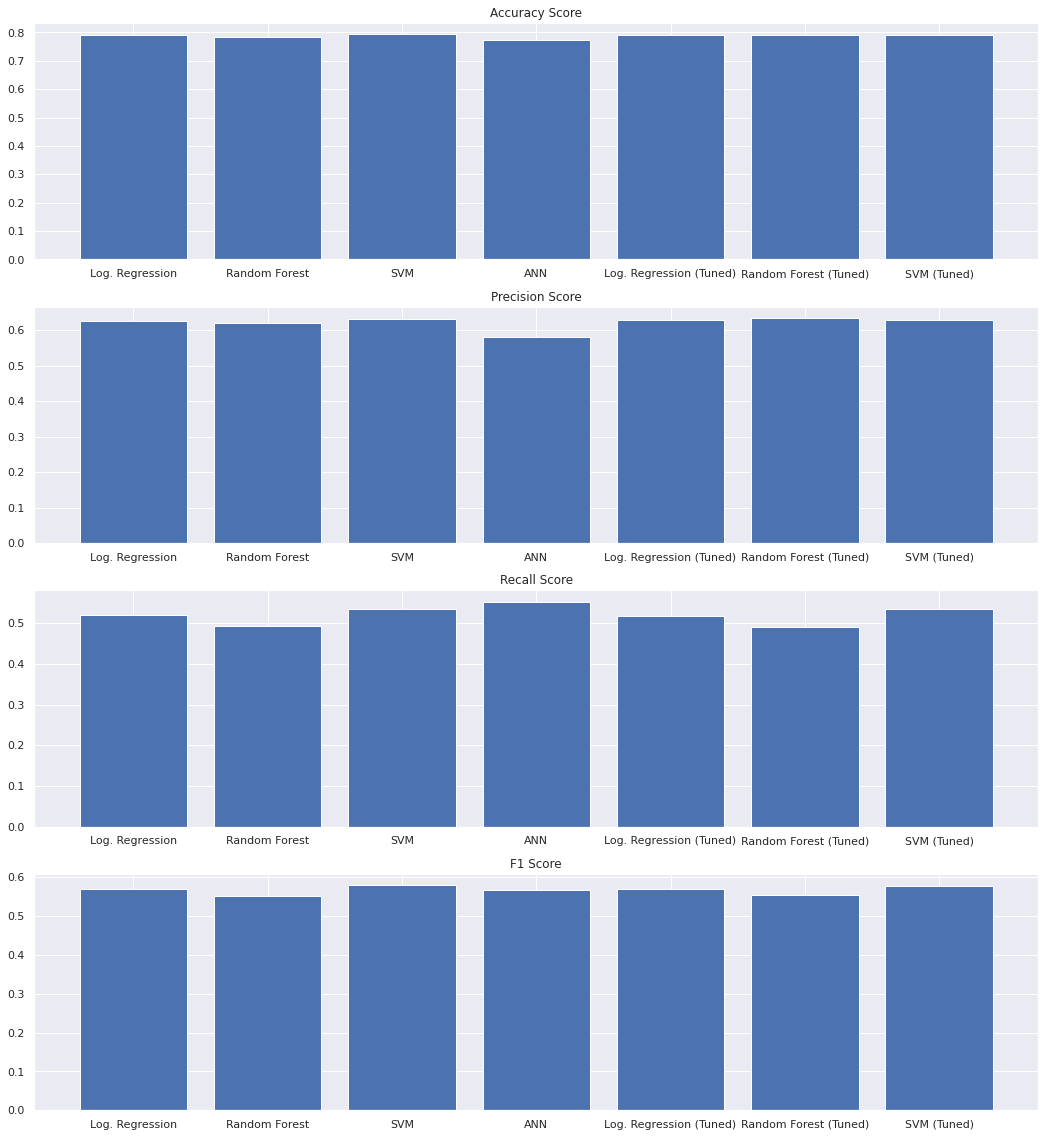

In [105]:
#Plots to compare all models 
fig, ax = plt.subplots(4, 1, figsize=(18, 20))
ax[0].bar(model_list, acc_list)
ax[0].set_title('Accuracy Score')
ax[1].bar(model_list, pre_list)
ax[1].set_title('Precision Score')
ax[2].bar(model_list, rec_list)
ax[2].set_title('Recall Score')
ax[3].bar(model_list, f1_list)
ax[3].set_title('F1 Score')

In [98]:
#Save model to a file
save_file = 'mrf_deploy.pickle'
pickle.dump(mrf_tuned_random, open(save_file, 'wb'))

#7: Inference Pipeline

##7.1: Load Saved Model

In [99]:
#Load model from File
model_saved = pickle.load(open(save_file, 'rb'))
model_saved

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190]),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  21...
       1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320,
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650,
       1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 176

##7.2: Predict on Sample Data

In [100]:
sample_input = data.drop(['Churn', 'TotalCharges', 'TotVAS'], axis=1).sample(2)

In [101]:
sample_input

gender  ...  PaymentMethod_Mailed check
5960       1  ...                           0
3234       1  ...                           1

[2 rows x 25 columns]

In [102]:
model_saved.predict_proba(sample_input)

array([[9.35428479e-01, 6.45715213e-02],
       [9.99019958e-01, 9.80042461e-04]])

In [103]:
model_saved.predict(sample_input)

array([0, 0])